In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import (classification_report,
                             confusion_matrix)
from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

__Prepare the data__

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


__Build Model__

In [3]:
def model_one(save=True):
    model = tf.keras.models.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=tf.nn.relu),
        Dense(64, activation=tf.nn.relu),
        Dense(64, activation=tf.nn.relu),
        Dense(64, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    model.summary()
    return model

In [4]:
def train_and_evaluate(model, save=True):
    history = model.fit(x=x_train, y=y_train, epochs=10, verbose=0);
    if save:
        model.save_weights('model_one.h5')
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
    return history, test_loss, test_acc

In [ ]:
model = model_one()
history, test_loss, test_acc = train_and_evaluate(model)

In [6]:
test_loss

0.1194161427437677

In [7]:
test_acc

0.9694

In [8]:
def post_fit_analysis(history):
    loss = history.history["loss"]
    accuracy = history.history["accuracy"]
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 5))
    epoch = list(range(1, len(loss) + 1))
    plt.plot(epoch, loss, label='loss')
    plt.plot(epoch, accuracy, label='accuracy')
    plt.xlabel('Epoch')
    plt.title("Accuracy and loss")
    plt.legend()
    y_pred = model.predict_classes(x_test)
    plot_confusion_matrix(y_test, y_pred, figsize=(8, 8));
    print(classification_report(y_test,
                                y_pred,
                                labels=list(range(0, 10))))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.94      0.96       892
           6       0.98      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



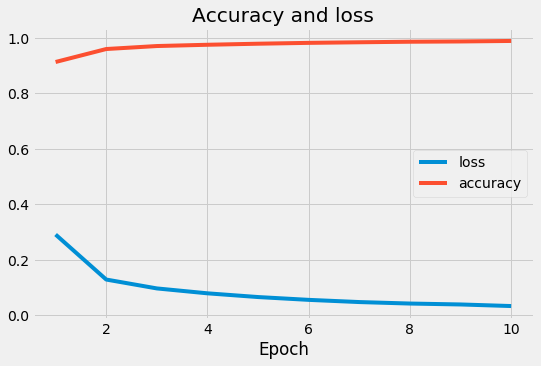

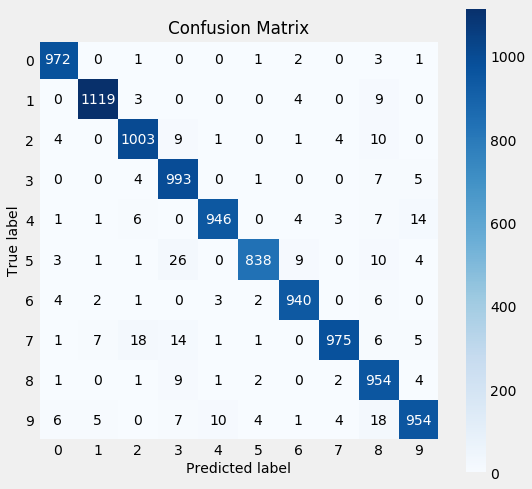

In [9]:
post_fit_analysis(history)